<a href="https://colab.research.google.com/github/Laoode/SentiFeedback/blob/Salma_Workspace/Analisis_Sentimen_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library jika belum ada
!pip install pandas scikit-learn

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from textblob import TextBlob
from google.colab import files

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
print("Upload file CSV Anda")
uploaded = files.upload()

Upload file CSV Anda


Saving FeedbackStudent.csv to FeedbackStudent.csv


In [24]:
#Membaca File CSV
for filename in uploaded.keys():
    print(f"Processing file: {filename}")
    data = pd.read_csv(filename, encoding='latin-1')
    print("Data sample:")
    print(data.head())

Processing file: FeedbackStudent.csv
Data sample:
      Id                                            comment quality
0  45881  Rand was a good guy, really... he was. But I f...   awful
1  45881  He is brilliant in his field, but expects his ...    poor
2  45881  He has a major in philosophy which is why all ...   awful
3  45881  I thought his class was extremely hard but des...    good
4  45881  I recently just finished taking Comp 110 with ...    poor


In [25]:
required_columns = {'Id', 'comment', 'quality'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"CSV file must contain columns: {required_columns}")

In [26]:
X = data['comment']
y = data['quality']

In [27]:
# Mengubah teks menjadi fitur numerik dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_transformed = vectorizer.fit_transform(X).toarray()

In [28]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [29]:
# Melatih Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Evaluasi Model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)


In [32]:
# Evaluasi Model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

In [33]:
# Menampilkan hasil evaluasi
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     average       0.27      0.08      0.13        84
     awesome       0.47      0.70      0.56       136
       awful       0.46      0.68      0.55        94
        good       0.26      0.17      0.21        88
        poor       0.40      0.27      0.32        67

    accuracy                           0.42       469
   macro avg       0.37      0.38      0.35       469
weighted avg       0.38      0.42      0.38       469



In [34]:
# Fungsi untuk menentukan sentimen
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [35]:
# Menambahkan kolom sentimen ke dataset
if 'comment' in data.columns:
    data['sentiment'] = data['comment'].apply(analyze_sentiment)
    print("Sentiment analysis completed. Data sample:")
    print(data[['comment', 'sentiment']].head())
else:
    print("Kolom 'comment' tidak ditemukan dalam dataset.")

Sentiment analysis completed. Data sample:
                                             comment sentiment
0  Rand was a good guy, really... he was. But I f...  positive
1  He is brilliant in his field, but expects his ...  positive
2  He has a major in philosophy which is why all ...  negative
3  I thought his class was extremely hard but des...  positive
4  I recently just finished taking Comp 110 with ...  negative


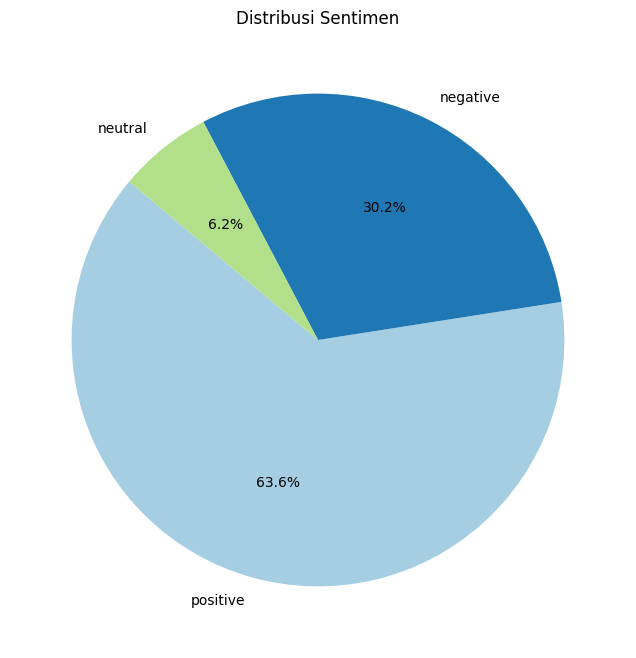

In [36]:
# Membuat visualisasi distribusi sentimen
sentiment_counts = data['sentiment'].value_counts()

# Membuat pie chart untuk distribusi sentimen
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribusi Sentimen')
plt.show()

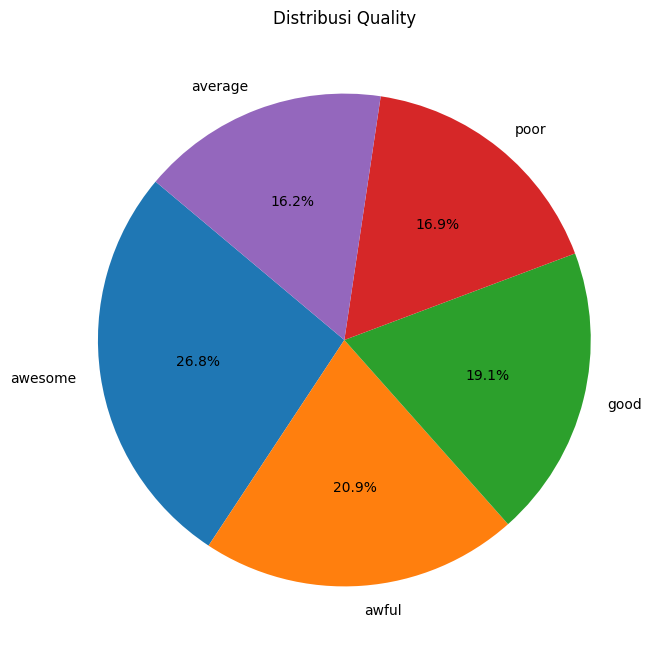

In [37]:
# Membuat plot pie chart untuk distribusi 'quality'
if 'quality' in data.columns:
    quality_counts = data['quality'].value_counts()

    # Membuat pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        quality_counts,
        labels=quality_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab10.colors
    )
    plt.title('Distribusi Quality')
    plt.show()
else:
    print("Kolom 'quality' tidak ditemukan dalam dataset.")
